In [1]:
from copulae1 import *

In [2]:
C = Clayton({'theta':10}, stats.norm, stats.norm)

In [13]:
s= C.sample(1000)

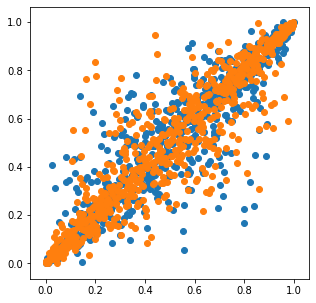

In [29]:
plt.figure(figsize=(5,5))
plt.scatter(u,v)
plt.scatter(1-u,1-v)

In [127]:
data = pd.read_csv('../data/btc future and reference rate/coingecko_future.csv')
brr = data.iloc[:,4]
btc = data.iloc[:,5]

u = ECDF(brr)(brr)
v = ECDF(btc)(btc)


u1 = 1-u
v1 = 1-v

In [132]:
C = Clayton({'theta':12}, stats.norm, stats.norm)
C.mm_calibrate(u1,v1, q_arr=[0.01,0.05,0.95,.99])

Optimization terminated successfully.
         Current function value: 0.255534
         Iterations: 46
         Function evaluations: 102


array([65.38109379])

In [139]:
q_arr = np.linspace(0.01,.99,50)
L_arr = []

for _ in range(2000):
    _id = np.random.choice(range(len(u)),len(u), True)
    _u = u[_id]
    _v = v[_id]
    L = np.array([empirical_lambda(_u,_v,q) for q in q_arr])
    L_arr.append(L)
    
L_arr = np.array(L_arr)
L = np.array([empirical_lambda(u,v,q) for q in q_arr])


In [136]:
L_C = np.array([C._lambda(1-q) for q in q_arr])


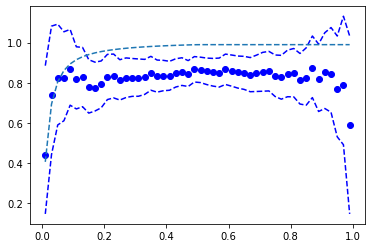

In [141]:
plt.plot(q_arr, L, 'bo', label='Empirical')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.05, axis=0), 'b--')
plt.plot(q_arr, np.quantile(np.array(L_arr), 0.95, axis=0), 'b--')
plt.plot(q_arr, L_C, '--', label="MM")

In [121]:
l_arr = []
theta_arr = np.linspace(1,10,100)

for theta in theta_arr:
    C = Clayton({'theta':theta}, stats.norm, stats.norm)
    l_arr.append(np.nanmean(np.log(C.c(1-u,1-v))))

/Users/francis/Google Drive/00_IRTG1792/copula/Py_notebooks/copulae1.py:370: RuntimeWarning: divide by zero encountered in power
  part1 = (1 + self.theta) * (u * v) ** (-1 - self.theta)
/Users/francis/Google Drive/00_IRTG1792/copula/Py_notebooks/copulae1.py:371: RuntimeWarning: divide by zero encountered in reciprocal
  part2 = (-1 + u ** (-self.theta) + v ** (-self.theta)) ** (-2 - (1 / self.theta))
/Users/francis/Google Drive/00_IRTG1792/copula/Py_notebooks/copulae1.py:372: RuntimeWarning: invalid value encountered in multiply
  return part1 * part2
/Users/francis/Google Drive/00_IRTG1792/copula/Py_notebooks/copulae1.py:371: RuntimeWarning: divide by zero encountered in power
  part2 = (-1 + u ** (-self.theta) + v ** (-self.theta)) ** (-2 - (1 / self.theta))


4.363636363636363


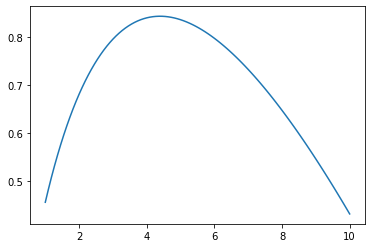

In [123]:
plt.plot(theta_arr, l_arr)
print(theta_arr[np.argmax(l_arr)])

In [105]:
theta=4.6
u1 = 1-u
v1 = 1-v
part1 = (1 + theta) * (u1 * v1) ** (-1 - theta)
part2 = (-1 + u1 ** (-theta) + v1 ** (-theta)) ** (-2 - (1 / theta))
part3 = part1*part2
part3[~np.isfinite(part3)] = np.min(part3[np.isfinite(part3)])*0.1
l = np.log(part3)
l[~np.isfinite(l)] = np.min(l[np.isfinite(l)]) * 10


/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


Optimization terminated successfully.
         Current function value: 0.093524
         Iterations: 61
         Function evaluations: 124
0.3216270330012391
Optimization terminated successfully.
         Current function value: -0.885051
         Iterations: 41
         Function evaluations: 94
0.8850511592051341


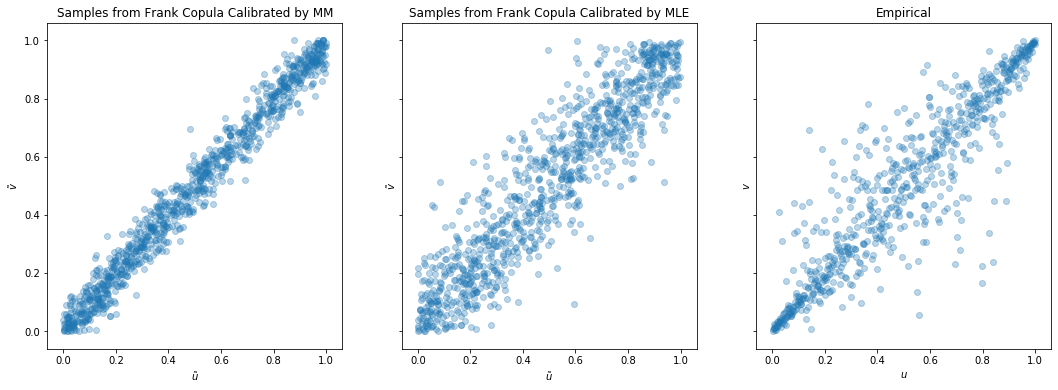

In [173]:
fig, ax = plt.subplots(1,
                       3, 
                       figsize=(15*1.2,5*1.2),
                       sharey=True,  sharex=True)
C = Frank({'theta':5}, stats.uniform, stats.uniform)
C.mm_calibrate(u,v,q_arr=[0.01,0.05,0.95,.99])

s = C.sample(1000)
ax[0].scatter(s[:,0],s[:,1], alpha=0.3)
ax[0].set_title('Samples from Frank Copula Calibrated by MM')
ax[0].set_xlabel(r'$\tilde{u}$')
ax[0].set_ylabel(r'$\tilde{v}$')
print(C.l_fn(C.theta, u,v))

C.canonical_calibrate(u,v)
s = C.sample(1000)
ax[1].scatter(s[:,0],s[:,1], alpha=0.3)
ax[1].set_title('Samples from Frank Copula Calibrated by MLE')
ax[1].set_xlabel(r'$\tilde{u}$')
ax[1].set_ylabel(r'$\tilde{v}$')
print(C.l_fn(C.theta, u,v))

ax[2].scatter(u,v, alpha=0.3)
ax[2].set_title('Empirical')
ax[2].set_xlabel(r'$u$')
ax[2].set_ylabel(r'$v$')
plt.savefig('../latex/_pics/Frank.png', transparent=True)